In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
data= pd.read_csv('Student_performance_data _.csv')
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [93]:
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [94]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


<Axes: >

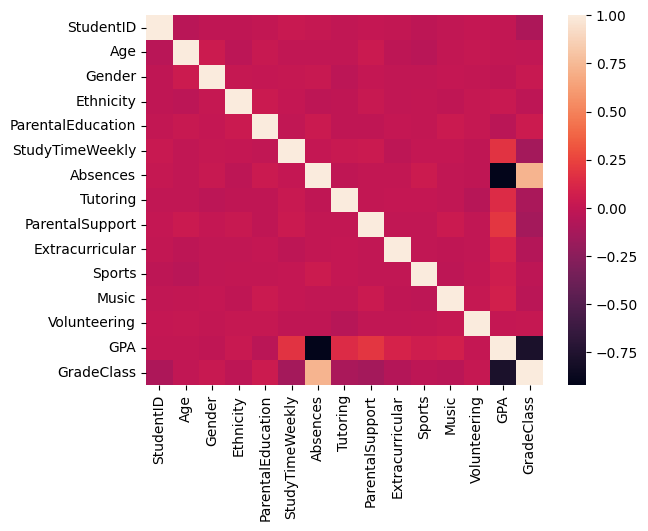

In [95]:
sns.heatmap(data.corr())

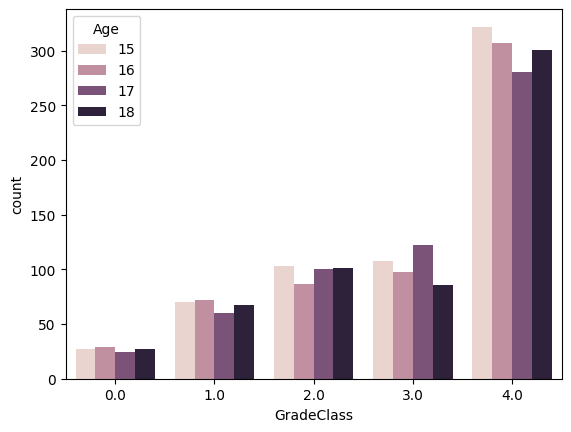

In [96]:
sns.countplot(data, x='GradeClass', hue='Age')
plt.show()

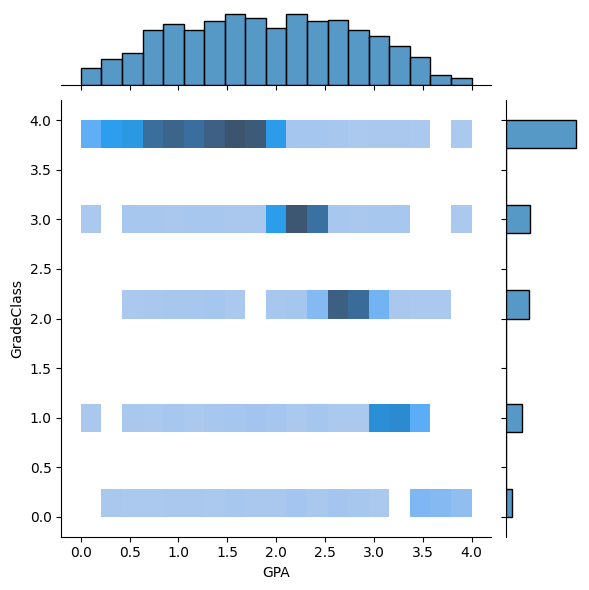

In [97]:
sns.jointplot(data, x='GPA', y='GradeClass', kind='hist')

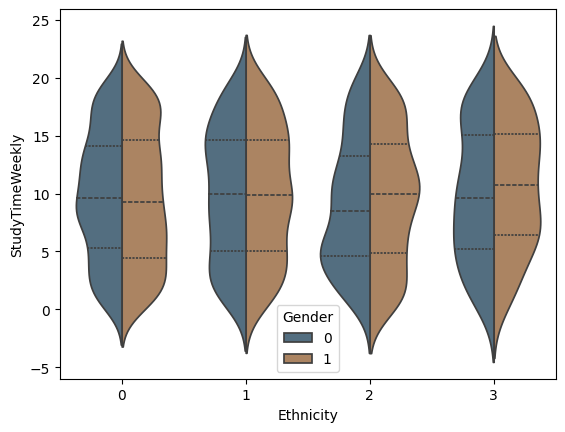

In [112]:
sns.violinplot(data, x='Ethnicity', y='StudyTimeWeekly', hue='Gender', split=True, inner='quart', saturation=0.3)
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [99]:
data = data.drop('StudentID', axis=1)

# Prepare features and labels
X = data.drop('GPA', axis=1).values
y = data['GPA'].values

# Apply threshold to convert GPA into binary classification
threshold = 2.0
y = (y >= threshold).astype(int)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [101]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
X_train.shape

(1794, 13)

In [103]:
model = Sequential()
model.add(Dense(14, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Model compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model training
history = model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_test_scaled, y_test))

/opt/anaconda3/envs/DataScience/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step,accuracy: 0.6201,loss: 0.6729,val_accuracy: 0.6656,val_loss: 0.6350
Epoch 2/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step,accuracy: 0.7217,loss: 0.6187,val_accuracy: 0.8060,val_loss: 0.5590
Epoch 3/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,accuracy: 0.8366,loss: 0.5258,val_accuracy: 0.8645,val_loss: 0.4541
Epoch 4/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,accuracy: 0.8647,loss: 0.4353,val_accuracy: 0.9030,val_loss: 0.3518
Epoch 5/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,accuracy: 0.9062,loss: 0.3284,val_accuracy: 0.9197,val_loss: 0.2752
Epoch 6/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,accuracy: 0.9268,loss: 0.2598,val_accuracy: 0.9314,val_loss: 0.2257
Epoch 7/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,accuracy: 0.9436,loss: 0.2224,val_accuracy: 0.9331,val_loss: 0.1965
Epoch 8/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step,accuracy: 0.9429,loss: 0.1951,val_accuracy: 0.9264,val_loss: 0.1851
Epoch 9/300
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

In [104]:
losses= pd.DataFrame(model.history.history)
losses

,accuracy,loss,val_accuracy,val_loss
0,0.644928,0.661074,0.665552,0.634987
1,0.759197,0.598228,0.806020,0.558984
2,0.843367,0.504434,0.864549,0.454110
3,0.885730,0.401394,0.903010,0.351816
4,0.909699,0.310700,0.919732,0.275181
...,...,...,...,...
295,0.996656,0.011310,0.979933,0.061698
296,0.997213,0.010414,0.978261,0.053533
297,0.997213,0.009690,0.971572,0.062815
298,0.997213,0.009952,0.971572,0.062220


<Axes: >

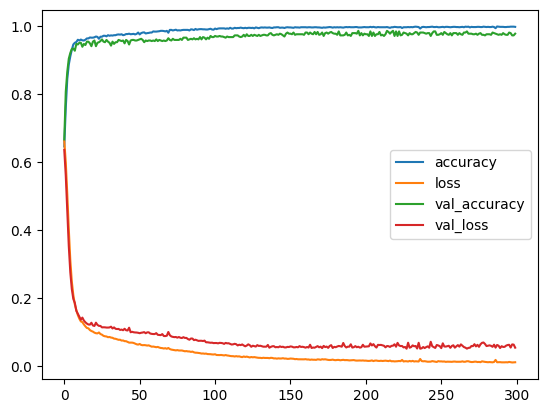

In [105]:
losses.plot()

In [106]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [107]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, log_loss
report = classification_report(y_test, y_pred, target_names=['Below Threshold', 'Above Threshold'])
print("Classification Report:\n", report)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

#ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

#Log Loss
log_loss_value = log_loss(y_test, y_pred_prob)
print("Log Loss:", log_loss_value)


Classification Report:
                  precision    recall  f1-score   support

Below Threshold       0.98      0.97      0.98       309
Above Threshold       0.97      0.98      0.98       289

       accuracy                           0.98       598
      macro avg       0.98      0.98      0.98       598
   weighted avg       0.98      0.98      0.98       598

Accuracy: 0.9765886287625418
Confusion Matrix:
 [[301   8]
 [  6 283]]
ROC-AUC Score: 0.9984994568929799
Log Loss: 0.05324822632940851
